In [2]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [3]:
os.listdir("../data/01_raw")

['.gitkeep', 'Employee.csv']

In [4]:
emp=pd.read_csv("../data/01_raw/employee.csv")

In [5]:
emp.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
emp.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Education analysis

In [8]:
edu = emp.Education.value_counts()
edu.index

Index(['Bachelors', 'Masters', 'PHD'], dtype='object')

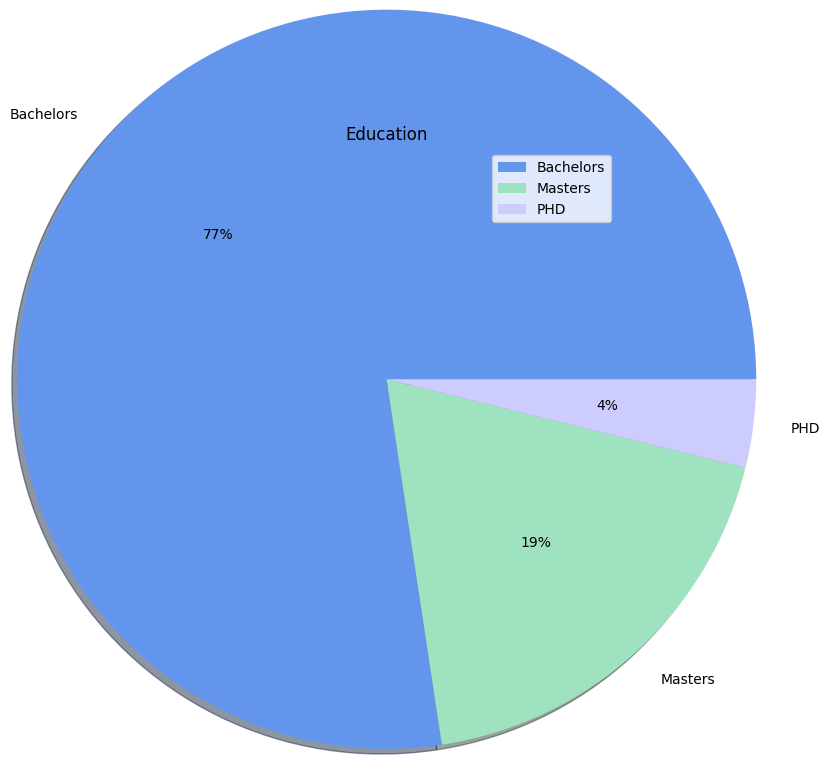

In [9]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
colors=["#6495ED","#9FE2BF","#CCCCFF"]
ax.pie(edu.values,labels = edu.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Education")
plt.legend(edu.index)
plt.show()

See education of leaving employees


In [10]:
left=emp[emp["LeaveOrNot"]==1]

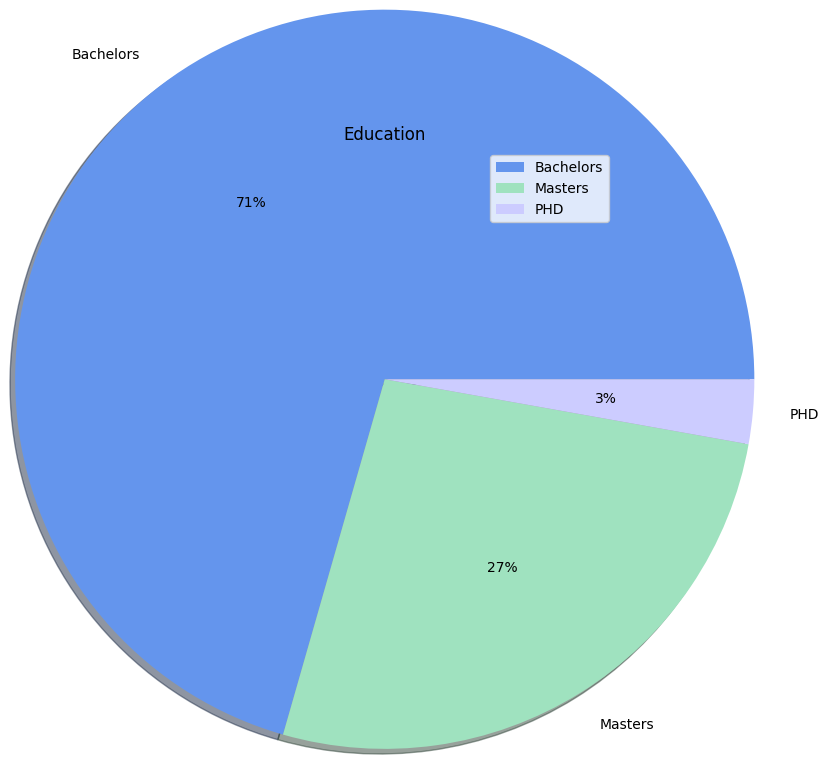

In [11]:
left_edu=left.Education.value_counts()
plt.figure(figsize=(10,6))
ax = plt.subplot()
colors=["#6495ED","#9FE2BF","#CCCCFF"]
ax.pie(left_edu.values,labels = left_edu.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Education")
plt.legend(left_edu.index)
plt.show()



What gender are the leaving employees ?


In [12]:
fcount=sum(emp["Gender"]=="Female")
mcount=sum(emp["Gender"]=="Male")
fpercent=fcount/emp.Gender.value_counts()
mpercent=mcount/emp.Gender.value_counts()

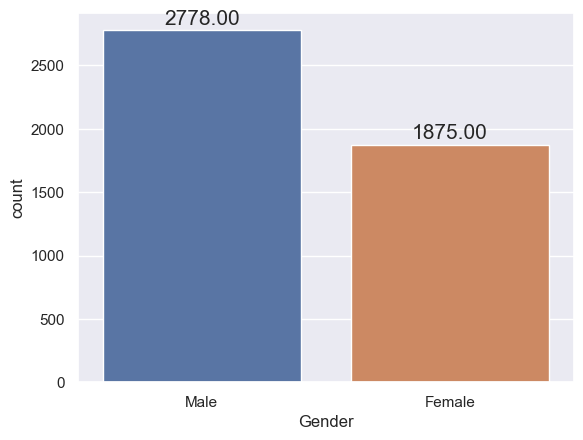

In [13]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=emp)

for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [14]:
tot=emp.Gender.value_counts()
fcount=tot.Female
mcount=tot.Male
fpercent=fcount/emp.Gender.count()
mpercent=mcount/emp.Gender.count()
fpercent,mpercent

(0.4029658284977434, 0.5970341715022566)

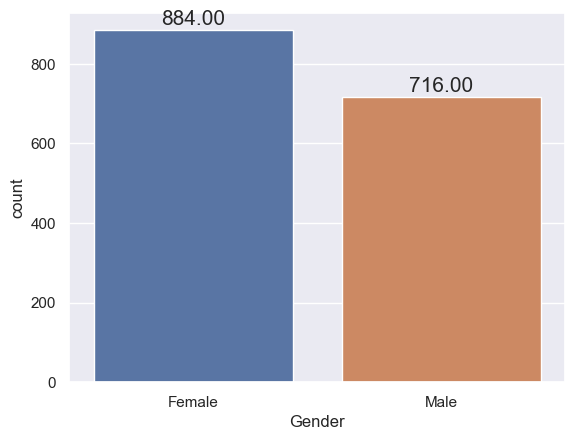

In [15]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=left)

for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

As we see, women leave the company more often

Researching how gender affects the data.

<Figure size 1000x800 with 0 Axes>

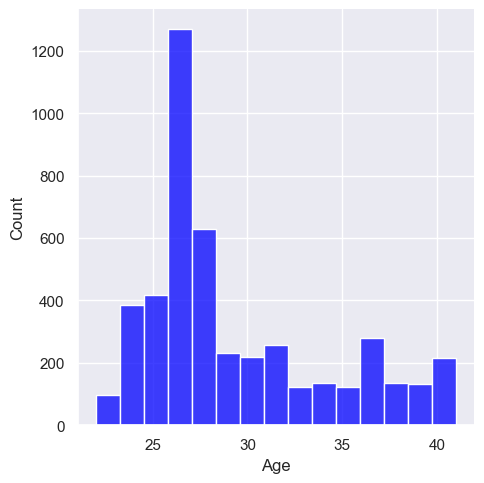

In [20]:
plt.figure(figsize=(10,8))
sns.displot(emp['Age'],color='blue',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()



Company mainly hires young people


<AxesSubplot: xlabel='JoiningYear', ylabel='Density'>

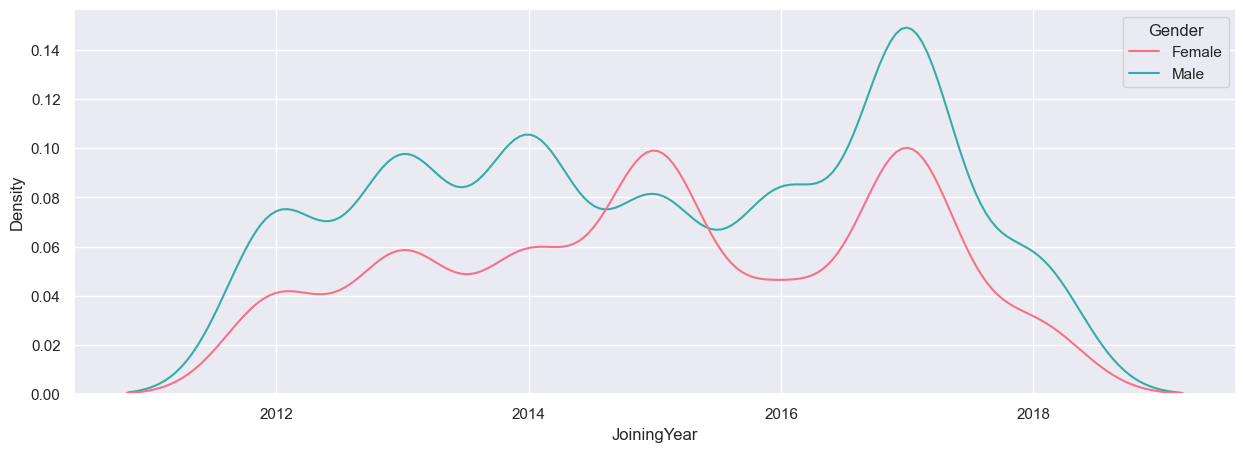

In [21]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=emp, x="JoiningYear",hue="Gender",palette='husl',hue_order=["Female","Male"],)

In 2016 and 2018 company didn't hire a lot of women

Exploring correlation

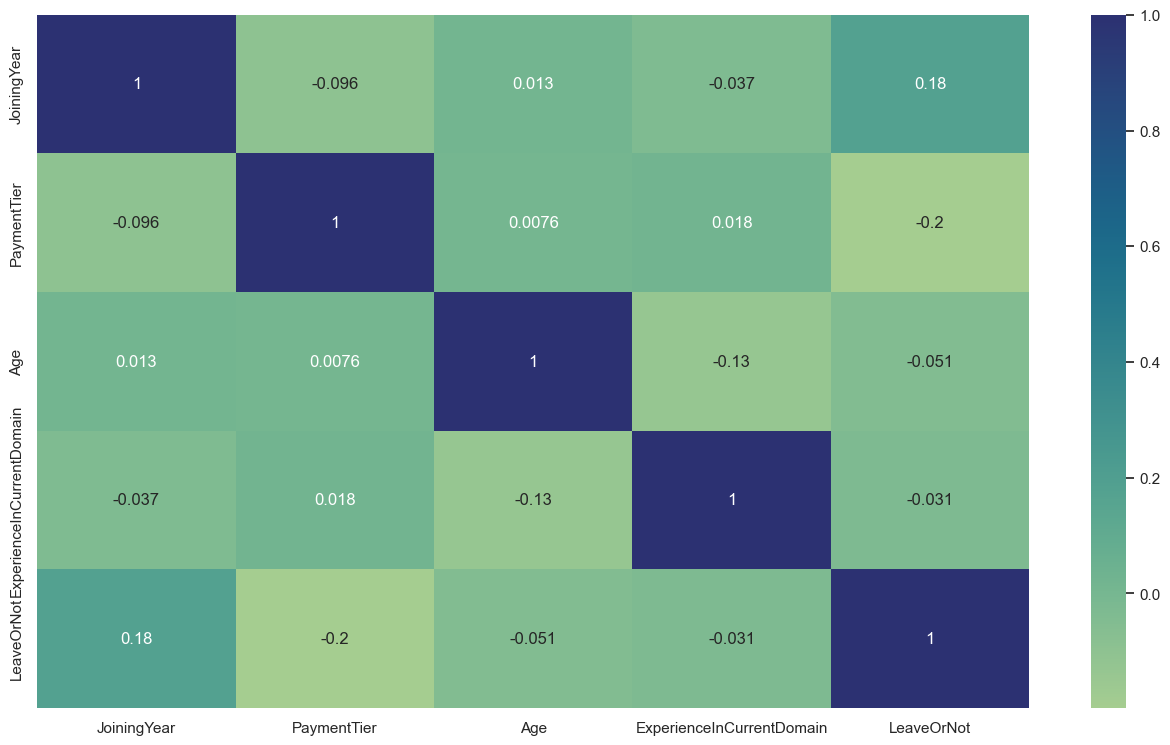

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(emp.corr(numeric_only=True),annot= True,cmap = 'crest')
plt.show()

Payment Tier , Joining year are the most affecting features on whether the employee leave or not .

Payment tiers.

<AxesSubplot: xlabel='PaymentTier', ylabel='count'>

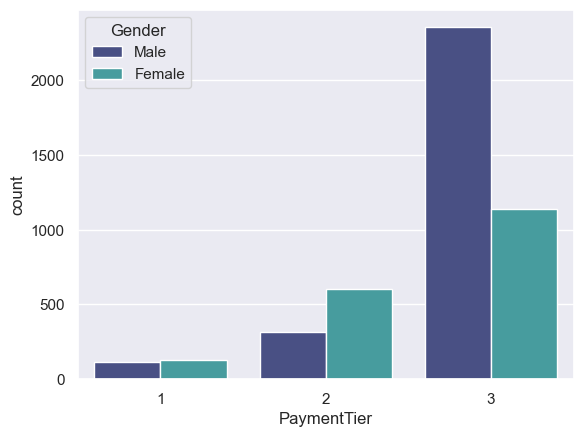

In [28]:
sns.countplot(data = emp, x= emp['PaymentTier'],hue = emp["Gender"],palette="mako")

There is a huge bias in payment Tier level 3 between male and females,and some bias in level 2.¶

<AxesSubplot: xlabel='PaymentTier', ylabel='count'>

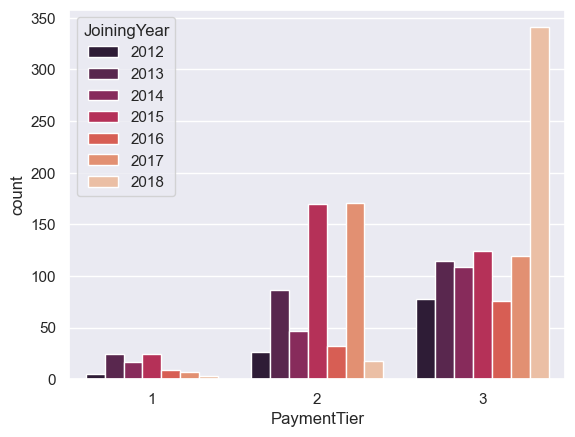

In [29]:
sns.countplot(data = left, x= left['PaymentTier'],hue = left["JoiningYear"],palette="rocket")

Most of employees who left the company are the recent joiners.at 2018 and most of them have payment tier 3.¶

<AxesSubplot: xlabel='PaymentTier', ylabel='count'>

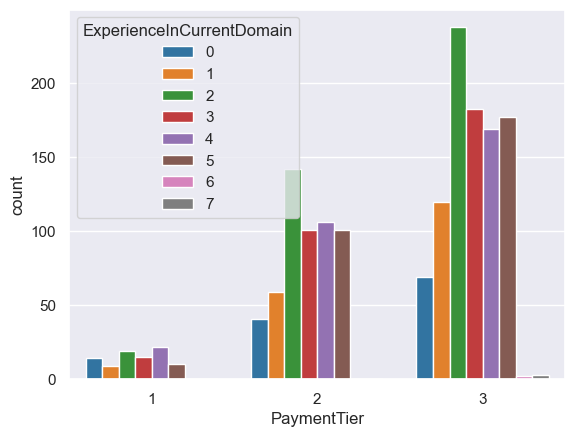

In [30]:
sns.countplot(data = left, x= left['PaymentTier'],hue = left["ExperienceInCurrentDomain"],palette="tab10")



This shows that most of employees who left the company have payment Tier of level 3 and most of the have 2 years of experience. this may convey that the company recently has tried to attract employees with high payment tiers.

Exploring offices location


<AxesSubplot: xlabel='City', ylabel='Count'>

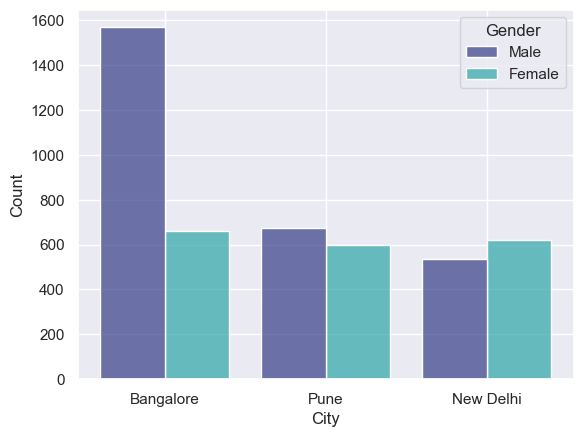

In [31]:
sns.histplot(data=emp, x="City", hue="Gender", multiple="dodge",palette="mako" ,shrink=.8)



Bias in hiring females occures at Banglore office


<AxesSubplot: xlabel='City', ylabel='Count'>

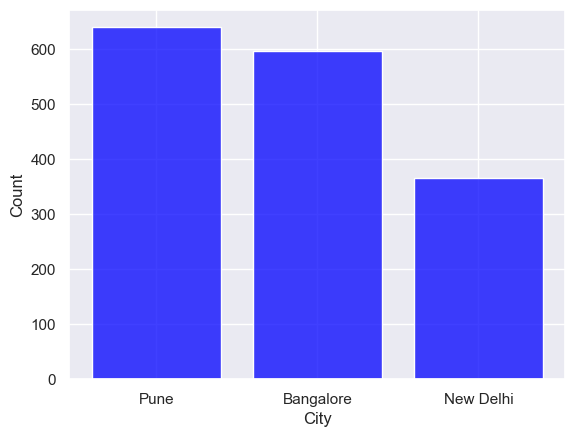

In [32]:
sns.histplot(data=left, x="City", multiple="dodge",color="blue" ,shrink=.8)



Most of employees who left the company are loacated at Pune office.

    1. Most of employees who left the company are Master's holders.
    2. Most of employees who left the company have Payment Tier 3 and 2 years of experience.
    3. There is bias in hiring females occures at Banglore office.
    4. Most of employees who left the company are Located at Pune Office.
    5. There is a huge bias in payment Tier level 3 between male and females,and some bias in level 2.

